# Assignment 2

In [107]:
import re
from textblob import TextBlob  
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np

# Importing Data File

In [108]:
df = pd.read_json(r'C:\Users\Usman\Desktop\Project\bjp.json', lines = True)

In [109]:
test = list()
for x in df['full_text'][:2000]:
    test.append(x)   

# Data Cleaning

In [110]:
def tweet_clean(tweet): 
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

# Clean Data Result

In [111]:
arr = []
for x in df:
    arr.append(tweet_clean(x))
arr[:10]

['contributors',
 'coordinates',
 'created at',
 'display text range',
 'favorite count',
 'favorited',
 'full text',
 'geo',
 'id',
 'id str']

# Applying Clustering

In [112]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans

In [113]:
cnt_vectorizer = CountVectorizer(stop_words='english')
cnt_vectorizer.fit(test)
print(cnt_vectorizer.vocabulary_)

{'better': 877, 'ticket': 5914, 'popular': 4507, 'faces': 2158, 'cinema': 1314, 'giving': 2459, 'terrorist': 5846, 'sadhvipragyasinghthakur': 5123, 'bjp': 956, 'tmc': 5931, 'm_lekhi': 3557, 'https': 2758, 'lvzwsfuyiz': 3544, 'rt': 5078, 'aagan86': 272, 'manjul': 3638, 'krishna': 3328, 'thakur': 5857, 'father': 2213, 'bjp4bengal': 958, 'candidate': 1143, 'bongaon': 1032, 'says': 5208, 'son': 5494, 'association': 686, 'congress': 1460, 'helping': 2656, 'dividing': 1878, 'secular': 5258, 'votes': 6309, 'ladakh': 3361, 'region': 4918, 'alleges': 488, 'pdp': 4361, 'loksabhaelections2019': 3504, 'dvxigtke1z': 1956, 'abpnewstv': 316, 'imported': 2854, 'hans': 2594, 'raj': 4789, 'party': 4326, 'thinks': 5894, 'northwestdelhi': 4123, 'eligible': 2038, 'contest': 1483, 'polls': 4497, 'arvindkejriwal': 647, 'htt': 2756, 'bignews': 933, 'president': 4578, 'amitshah': 520, 'massive': 3674, 'crowd': 1581, 'amethi': 510, 'faith': 2173, 'pm': 4464, 'narendramodi': 3999, 'going': 2487, 'win': 6412, 'el

In [114]:
vec1 = cnt_vectorizer.transform(test).toarray()
print(vec1.shape)

(2000, 6627)


In [115]:
vec1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [116]:
km = KMeans(n_clusters=4)

In [117]:
km.fit(vec1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [118]:
labels = km.labels_

In [119]:
labels

array([2, 1, 2, ..., 1, 1, 1])

Set A 94
Set B 1201
Set C 702
Set D 3


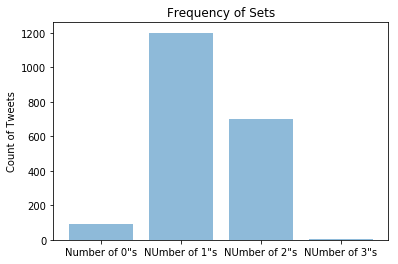

In [120]:
SetA = 0
SetB = 0
SetC = 0
SetD = 0

for x in labels:
    if x == 0:
        SetA = SetA + 1
    elif x == 1:
        SetB = SetB + 1
    elif x == 2:
        SetC = SetC + 1
    else:
        SetD = SetD + 1
        
print('Set A', SetA)
print('Set B', SetB)
print('Set C', SetC)
print('Set D', SetD)

objects = ('Number of 0"s', 'NUmber of 1"s', 'NUmber of 2"s', 'NUmber of 3"s')
y_pos = np.arange(len(objects))
performance = [SetA,SetB,SetC,SetD]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count of Tweets')
plt.title('Frequency of Sets')
 
plt.show()

# Using TextBlob 

In [121]:
public_tweets = df

# Sentiment Analysis

In [122]:
positive_tweets = []
negative_tweets = []
neutral_tweets  = []
sentiment = []
for tweet in public_tweets["full_text"]:
    print(tweet)
    analysis = TextBlob(tweet)
    print(analysis.sentiment)
    if analysis.sentiment[0]>0:
       sentiment.append('Positive')
       positive_tweets.append("text")
       print ('Positive')
    elif analysis.sentiment[0]<0:
       sentiment.append('Negative')
       negative_tweets.append("text")
       print ('Negative')
    else:
       sentiment.append('Neutral')
       neutral_tweets.append("text")
       print ('Neutral')

It's always better to give ticket to popular faces of cinema rather giving it to a terrorist. 
#SadhviPragyaSinghThakur 
#BJP 
#TMC 
@M_Lekhi https://t.co/lVzWsFUYIZ
Sentiment(polarity=0.55, subjectivity=0.7)
Positive
RT @Aagan86: Manjul Krishna Thakur, father of @BJP4Bengal candidate in Bongaon, says neither he nor his son have any association with the #…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Congress helping #BJP by dividing secular votes of #Ladakh region, alleges PDP  

#LokSabhaElections2019
https://t.co/dVXigtke1z
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @abpnewstv: #BJP 'imported' Hans Raj Hans as party thinks no one in #NorthWestDelhi is 'eligible' to contest polls: #ArvindKejriwal  htt…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
#BIGNEWS: #BJP President @AmitShah says the massive crowd in #Amethi have faith in PM @NarendraModi and #BJP is going to win the elections here. https://t.co/sDyCsYLy3Z
Sentiment(polarity=0.4, subjectivity=0.7)
Positive
.

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
No one can do it. #FaniCyclone #modi #bjp #india #politics https://t.co/OtH10T3yxO
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @AITCofficial: #BJP lies on #Singur exposed

#SingurIsSmiling https://t.co/TahvY1U98h
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Where is those muslim candidate of shivsena when they announced about hijab ban.
#bikgayesale #shivsena #ndtv #aimim #kuchtosharamkarlo #Congress #bjp #kunalkamra #KanhaiyaKumar
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
The South Delhi Seat will witness a tough fight between @AamAadmiParty - Delhi, @BJP4India &amp; @INCIndia.

Check out our interview with @raghav_chadha. Delhi goes to polls on 12th May.  

@rameshbidhuri

#RaghavChada #AAP #Congress #BJP #Delhi #LokSabhaElections2019
Sentiment(polarity=-0.3888888888888889, subjectivity=0.8333333333333334)
Negative
RT @ians_india: Pointing fingers at the #BJP for being the one who allowed #JeM chief #MasoodAzhar 

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
what's the prob?this #BJP leader is only'adapting'#Modi Ji&amp; #AmtiShah Ji's line?both of whom have perma #CleanChit pass?on #ModelCodeOfConduct?
@SpokespersonECI @ECISVEEP @ceoup @CeodelhiOffice @AshokLavasa
@DrSYQuraishi @shahid_siddiqui @SankarshanT @SreenivasanJain @rssurjewala https://t.co/KMquuYVltL
Sentiment(polarity=0.0, subjectivity=1.0)
Neutral
RT @KOLLEO: @BJP4India #Promises by #BJP 
Petrol @30/Lt 
Promise $ @40Rs
Employment 2cr/yr
15Lc per ac
Demolish of 370
RamMandir
Acchedin e…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @Voice_For_India: Tamil Muslims at the Kaaba in Mecca praying for destruction of #Modi #RSS and #BJP ... All this "peaceful religion" wa…
Sentiment(polarity=0.25, subjectivity=0.5)
Positive
The left n liberal groups struggles to stay united similar to how bahujan,dalits, adivasis n muslims dont unite for many differences while the rightwing remains undivided,this is the reason why #BJP will com

Neutral
RT @i_theindian: @bainjal Ram Madhav - National General Secretary of nationalist #BJP, was caught red handed performing shakha certified se…
Sentiment(polarity=0.02500000000000001, subjectivity=0.25)
Positive
Those who support terrorists or terrorism directly or by other means are themselves, terrorist.
#BJP
Sentiment(polarity=-0.125, subjectivity=0.375)
Negative
RT @BJP_Wrestling: @BJP_Wrestling supporting the #1 team in the state @BJHSBaseball !!! 2-0 Patriots in the 4th! #BJP #ABV https://t.co/MCP…
Sentiment(polarity=0.6103515625, subjectivity=0.25)
Positive
RT @kamaalrkhan: According to survey reports, #congress can win 230 seats and #BJP can win 145 seats, while others can win 168 seats in #Lo…
Sentiment(polarity=0.8000000000000002, subjectivity=0.4000000000000001)
Positive
@JhaSanjay Bhai aapki angrezi thodi off hai.. The statement should be “Hey #BJP, we are snakes.”
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
What is the condition of those people of Puri, where #S

Sentiment(polarity=0.1, subjectivity=0.1)
Positive
RT @SudheenKulkarni: "The entire Army is standing with #BJP and #NarendraModi."

What gives Union Minister #RajyavardhanSinghRathore the co…
Sentiment(polarity=0.0, subjectivity=0.625)
Neutral
RT @ians_india: #BJP candidate from North West #Delhi Lok Sabha seat and famous #Punjabi singer #HansRajHans said that he will file a defam…
Sentiment(polarity=0.5, subjectivity=1.0)
Positive
RT @Gitanjali_DS: @republic #ViolentHinduComment:

Did you notice sudden discomfort in #Libtards &amp; #Commies?
Did you notice sudden change i…
Sentiment(polarity=0.0, subjectivity=0.5)
Neutral
@realDonaldTrump Did you discuss #India ? And how #NarendraModi of the #BJP party is going to win the #Elections2019 and take India to the next level of development?
Sentiment(polarity=0.4, subjectivity=0.2)
Positive
RT @karunasagarllb: This is #Riyaz , a dreaded #ISIS suicide bomber from #Kerala, he was arrested by #NIA in cine style... thanks to #BJP g…
Sentiment(p

Sentiment(polarity=0.5, subjectivity=0.5)
Positive
@htTweets @Uraghuvanshi Then what abt congress promises  ?? 
What abt 55 years  promises ?? 
What abt poverty promises over 55 years ?? 
What abt 55 years of So called "ANYAY "  of congress ?? #Congress #RahulGandhi #PriyankaGandhi #BJP
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @karunasagarllb: This is #Riyaz , a dreaded #ISIS suicide bomber from #Kerala, he was arrested by #NIA in cine style... thanks to #BJP g…
Sentiment(polarity=0.2, subjectivity=0.2)
Positive
@NH_India And #BJP is doing all efforts to made #citizenship as poll issue.
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Cyclone Fani will affect 4 non BJP states ..Odisha,West Bengal, Kerala and Andhra Pradesh.....this is a  planned conspiracy - PAPPU 😂😂 

 #India #NaMo #BJP #Pappu #RaGa
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @FriedrichPieter: As @rishikumar1, a @CityofSaratoga councillor, runs for #USCongress, I spoke at city council about threa

RT @SudheenKulkarni: "The entire Army is standing with #BJP and #NarendraModi."

What gives Union Minister #RajyavardhanSinghRathore the co…
Sentiment(polarity=0.0, subjectivity=0.625)
Neutral
RT @pathan_sumaya: Sometimes, Silence Speaks Louder Than Words.  #BJP-ally Nitish Kumar's 'Enthusiasm' During #Modi's Vande Mataram Chant S…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
#BJP thought only #SunnyDeol can save them in this election
Sentiment(polarity=0.0, subjectivity=1.0)
Neutral
RT @i_theindian: @bainjal Ram Madhav - National General Secretary of nationalist #BJP, was caught red handed performing shakha certified se…
Sentiment(polarity=0.02500000000000001, subjectivity=0.25)
Positive
BJP busy doing ads as farmers suffer: Priyanka 
#BJP #PriyankaGandhi #Congress #LokSabhaElections2019 
https://t.co/MWapQHu0VQ
Sentiment(polarity=0.1, subjectivity=0.3)
Positive
RT @JhaSanjay: What a luminous paradox : 

Despite targeted by planted propaganda by mainstream media( most) the #Congr

Positive
@aajtak It's @BJP4India paid people. They keep doing it and put videos on the social media. My question is if I don't like @INCIndia then why I would go to its events. They can very well chant Namo Namo in #bjp events or own homes.
Sentiment(polarity=0.27777777777777773, subjectivity=0.45555555555555555)
Positive
RT @JhaSanjay: #BJP releases #MasoodAzharTerrorist, escorts him to Kandahar. 

#MasoodAzhar commits ghastly acts of terror against India ri…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @ETPolitics: "In order to gauge the mood of the state, here's a short clip from my last rally in #Jaipur. It is clear people of the sate…
Sentiment(polarity=0.03333333333333334, subjectivity=0.25)
Positive
"In order to gauge the mood of the state, here's a short clip from my last rally in #Jaipur. It is clear people of the sate want #BJP," PM #Modi tweeted https://t.co/V7st8QNRT3
Sentiment(polarity=0.03333333333333334, subjectivity=0.25)
Positive
RT @JhaSanjay: So the #BJP does

Positive
RT @SandipGhose: For @TheEconomist to suggest “period of bickering and statis” even at the cost of delaying reforms as an antidote to #BJP…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @KumariRukshmani: "Congress is fighting this election on its own strength. I'd rather die than benefit #BJP. We have chosen candidates t…
Sentiment(polarity=0.6, subjectivity=1.0)
Positive
@I_am_Anil_Tyagi Orisaaa ,andhra, tamilnadu , Karnataka and all east state will be king maker for #BJP
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
After the fantastic results of government schools of Delhi, if still hard core supporters of #BJP supporters do not accept the fact that @AamAadmiParty has performed well.
I am sorry your nationalism is fake &amp; you do not want improvement in education system.
Sentiment(polarity=-0.22291666666666665, subjectivity=0.8604166666666666)
Negative
RT @abpnewstv: #BJP requests #Delhi poll body to let it air Padman &amp; Toilet-Ek Prem Katha films on NaMo TV

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @JhaSanjay: Dear @ECISVEEP : If this gentleman is not promptly banned and serious action taken, I am sorry, but then you are abdicating…
Sentiment(polarity=-0.24444444444444444, subjectivity=0.5888888888888889)
Negative
RT @BJPSanjayJoshi: India had been referred to as the 'Golden Bird' in earlier days. It is time for us to contribute to the flight of the G…
Sentiment(polarity=0.15, subjectivity=0.5)
Positive
RT @Voice_For_India: Message from USA to India. Vote for Modi Ji. Every Vote Counts. India needs Modi. No More Looters. Get Out &amp; Vote. Hin…
Sentiment(polarity=-0.25, subjectivity=0.5)
Negative
RT @JhaSanjay: So the #BJP does not know that #Gadchiroli is in Maharashtra not Chhattisgarh. 

This is the effect of #Modi ‘s foreign trip…
Sentiment(polarity=-0.125, subjectivity=0.125)
Negative
RT @JhaSanjay: So the #BJP does not know that #Gadchiroli is in Maharashtra not Chhattisgarh. 

This is the effect of #Modi ‘s foreign trip

Sentiment(polarity=-0.1, subjectivity=0.14166666666666666)
Negative
RT @JhaSanjay: #BJP releases #MasoodAzharTerrorist, escorts him to Kandahar. 

#MasoodAzhar commits ghastly acts of terror against India ri…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @Voice_For_India: Tamil Muslims at the Kaaba in Mecca praying for destruction of #Modi #RSS and #BJP ... All this "peaceful religion" wa…
Sentiment(polarity=0.25, subjectivity=0.5)
Positive
RT @JhaSanjay: #BJP releases #MasoodAzharTerrorist, escorts him to Kandahar. 

#MasoodAzhar commits ghastly acts of terror against India ri…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@aajtak Why not to encourage #BJP karyakartas someday !😀
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @JhaSanjay: Hey #BJP,  we can handle snakes.
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
#GE2019: #BJP's Amit Shah begins backchannel talks with Jagan #andhrapradesh Elections2019 #YSRCP https://t.co/RUEuvf1Go0
Sentiment(polarity=0.0, subjec

Neutral
BJP gets a shot in the arm after UNSC list Masood Azhar as global terrorist: Omar
#BJP #UNSC #MasoodAzhar #global #terrorist @OmarAbdullah #Pakistan #JeM #NationalConference #NC #Chinese #diplomats  #terror #Kashmir 

https://t.co/6Ll6AAvl2E .
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @JhaSanjay: #BJP releases #MasoodAzharTerrorist, escorts him to Kandahar. 

#MasoodAzhar commits ghastly acts of terror against India ri…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @EconomicTimes: Cricketer-turned-politician @sherryontopp also rejected the #BJP's charge that no development has taken place in the cou…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @abpnewstv: #BJP requests #Delhi poll body to let it air Padman &amp; Toilet-Ek Prem Katha films on NaMo TV 

More Details: https://t.co/3tg…
Sentiment(polarity=0.5, subjectivity=0.5)
Positive
RT @FinancialXpress: Does #BJP give money to voters: #ArvindKejriwal after #BJP complaint

https://t.co/hTq5VAe6MM
Senti

@BJP4India @narendramodi Only for #BJP.
#JAI #SHREE #RAM https://t.co/yzuRgBR65n
Sentiment(polarity=0.0, subjectivity=1.0)
Neutral
RT @karunasagarllb: This is #Riyaz , a dreaded #ISIS suicide bomber from #Kerala, he was arrested by #NIA in cine style... thanks to #BJP g…
Sentiment(polarity=0.2, subjectivity=0.2)
Positive
RT @Voice_For_India: Tamil Muslims at the Kaaba in Mecca praying for destruction of #Modi #RSS and #BJP ... All this "peaceful religion" wa…
Sentiment(polarity=0.25, subjectivity=0.5)
Positive
RT @ashishdua_INC: #BJP sold slogans like #Kashi will be #Kyoto...#Mumbai will be better than #Shanghai...#Kejriwal is selling Delhi will b…
Sentiment(polarity=0.5, subjectivity=0.5)
Positive
@JhaSanjay Hey #BJP,  we can handle snakes.

Instead of this... It can be said.
1)  Hey #BJP,  we can handle "even" snakes.
2). Hey #BJP,  we can handle snakes too.

"तुम्हारी क्या ओकात है"... 
 
M I correct...?
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @JhaSanjay: Hey #BJP,  we c

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @SudheenKulkarni: Here's #DrManmohanSingh puncturing #Modi's balloon that he alone has the guts to order #SurgicalStrikes

India must re…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @firstpost: #LokSabhaElections2019 | In an interview to Hindustan Times, former PM #ManmohanSingh said never before had an Indian govern…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
What has #BJP given to #India in last 5 years ?

#ChowkidarChorHai 
#AmitShahMurderAccused 
#YogiAdityanathCMonBail
#NitishKumarMurderAccused
#SmritiYeLeWoLe
#RajnathKadiNinda
#SambitBhonBhon 
#ArunJhootely 
And so on Mostly #AntiNational 

This is their leadership ?
Sentiment(polarity=0.25, subjectivity=0.2833333333333333)
Positive
RT @JhaSanjay: #BJP releases #MasoodAzharTerrorist, escorts him to Kandahar. 

#MasoodAzhar commits ghastly acts of terror against India ri…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @abpnewstv: #BJP requests #Delhi poll b

Positive
RT @Voice_For_India: Tamil Muslims at the Kaaba in Mecca praying for destruction of #Modi #RSS and #BJP ... All this "peaceful religion" wa…
Sentiment(polarity=0.25, subjectivity=0.5)
Positive
RT @YouPolitical4: PM @narendramodi Chowkidaar Our Govt Working for Poor. #ModiMeinHaiDum

#LokSabhaElections2019 #BJP .

PM Narendra Modi…
Sentiment(polarity=-0.4, subjectivity=0.6)
Negative
Scrutinize some interesting portfolios #NarendraModi #rahulgandhi #bjp #congress #loksabhapolls #LokSabhaElections2019 
https://t.co/ss7THhv0J6
Sentiment(polarity=0.5, subjectivity=0.5)
Positive
RT @Voice_For_India: Tamil Muslims at the Kaaba in Mecca praying for destruction of #Modi #RSS and #BJP ... All this "peaceful religion" wa…
Sentiment(polarity=0.25, subjectivity=0.5)
Positive
RT @Voice_For_India: Tamil Muslims at the Kaaba in Mecca praying for destruction of #Modi #RSS and #BJP ... All this "peaceful religion" wa…
Sentiment(polarity=0.25, subjectivity=0.5)
Positive
RT @Voice_For_India: Tami

Sentiment(polarity=0.1, subjectivity=0.4)
Positive
After #PulwamaTerrorAttack when #ManojTiwari put on the army dress and went on streets to ask for vote, a lot of political parties opposed him and #BJP.
But when #TejBahadurYadav does that they have no issues.
Note - since Tej is dismissed he is now a common man like Manoj was. https://t.co/5Moyz5jTAK
Sentiment(polarity=-0.15, subjectivity=0.3)
Negative
Yet another example of trivialization of core institute by #BJP government
It's really like an undeclared emergency https://t.co/D27s11W2Fj
Sentiment(polarity=0.2, subjectivity=0.2)
Positive
RT @JioNews: #BJP Leader &amp; Union Minister @smritiirani's son Zohr Irani scored 91% in his Class 12th Board 2019 with 94% in Economics. #CBS…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @ashishdua_INC: Nation rightly says...#BJP neither has a sense of history, nor do they know geography... Shakhas only teach them how to…
Sentiment(polarity=0.14285714285714285, subjectivity=0.767857142857

Sentiment(polarity=-0.5, subjectivity=0.9)
Negative
Priyanka: 'Anti-Poor BJP Against NYAY' | Priyanka Gandhi says the BJP is criticising the NYAY scheme because it's a plan which benefits the poor, and not the rich
#PriyankaGandhi #NYAY #BJP https://t.co/PeOlYA78JS
Sentiment(polarity=-0.012500000000000011, subjectivity=0.675)
Negative
Why did you jump into the bring before being ready?

What are you going to do in the parliament by chance you win?

Why did #BJP nominate an incapable person for that constituency?!

Don't they have any concern for the people? https://t.co/2oNB8vmKNP
Sentiment(polarity=0.6, subjectivity=0.45)
Positive
RT @karunasagarllb: This is #Riyaz , a dreaded #ISIS suicide bomber from #Kerala, he was arrested by #NIA in cine style... thanks to #BJP g…
Sentiment(polarity=0.2, subjectivity=0.2)
Positive
RT @RisingKashmir: Independent candidate for #Ladakh LS constituency not #BJP’s proxy: Sagar

#Rknews https://t.co/2nbn7tcRVs
Sentiment(polarity=0.0, subjectivity=0.125

Sentiment(polarity=-0.21666666666666667, subjectivity=0.8333333333333334)
Negative
RT @kamaalrkhan: According to survey reports, #congress can win 230 seats and #BJP can win 145 seats, while others can win 168 seats in #Lo…
Sentiment(polarity=0.8000000000000002, subjectivity=0.4000000000000001)
Positive
RT @AITCofficial: #BJP knows zero about #Bengal. One big zero. Here’s just one more example.

Signboard Babu keeps saying Saraswati Puja is…
Sentiment(polarity=0.25, subjectivity=0.3)
Positive
#BJP credits Modi's leadership as UN designates Masood Azhar global terrorist https://t.co/8j8suGF9Gi #indianpolitics #india
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @TarunRathi9898: Today schedule for @iamsunnydeol's campaign in #Gurdaspur. 

Join in large numbers and support Sunny Paaji. 

#Sunny4Gu…
Sentiment(polarity=0.21428571428571427, subjectivity=0.42857142857142855)
Positive
#bjp should admit responsibility for this &amp; for #intelligenceFailure or letting the jawans die for 

It's interesting that election commissioner haven't find any misconduct in speeches of our PM. As per I think Army or Martyrs should not be used for campaigning. Spare them at least . #ElectionCommissionOfIndia #BJP #NarendraModi can i have tour words sir @DrKumarVishwas
Sentiment(polarity=0.1, subjectivity=0.45)
Positive
Lok Sabha Polls Phase 5: BJP faces MGB heat in 7 UP seats 
#LokSahaElections2019 #BJP #MGB #UttarPradesh 
https://t.co/i2UJzlG4yL
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @naa14847: Caught Red handed by media: #indian army officials forcing voters to vote for #BJP https://t.co/x4Cp0mSGCw
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@OmarAbdullah You seem to be the Dumbest of the dumber lot! You are so hassled by the popularity of #BJP that even #UnitedNations  ban on #JeM sounds like a game plan made by @narendramodi 

https://t.co/p538jcW3S0
Sentiment(polarity=-0.4, subjectivity=0.4)
Negative
RT @karunasagarllb: This is #Riyaz , a dreaded #ISIS suici

RT @vijayrpandey: The EC’s transfer order comes days after #PMModi held a rally in Cooch Behar, where #BJP leader Mukul Roy openly threaten…
Sentiment(polarity=0.0, subjectivity=0.5)
Neutral
RT @pennewstweet: An Election Of Mythological Proportions!
#RamNavami #SriKrishna #Janmashtami  #RamLeela #Ravana #Kumbhakarna #Meghnad #Du…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @pennewstweet: An Election Of Mythological Proportions!
#RamNavami #SriKrishna #Janmashtami  #RamLeela #Ravana #Kumbhakarna #Meghnad #Du…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
#RajThackeray says no to campaign for #BJP rivals in other poll-bound states https://t.co/T3bRdHJlbv, reports @ss_suryawanshi

#LokSabhaElections2019 

https://t.co/028NUuZL1H
Sentiment(polarity=-0.125, subjectivity=0.375)
Negative
RT @GomatiSivam: Replace white with saffron in #ADMK party flag and add lotus symbol. It's much more appropriate 😁😁

#TTVDhinakaran #AMMK #…
Sentiment(polarity=0.3333333333333333, subjectivity=0.

Sentiment(polarity=-0.11666666666666668, subjectivity=0.7333333333333334)
Negative
RT @karunasagarllb: This is #Riyaz , a dreaded #ISIS suicide bomber from #Kerala, he was arrested by #NIA in cine style... thanks to #BJP g…
Sentiment(polarity=0.2, subjectivity=0.2)
Positive
RT @karunasagarllb: This is #Riyaz , a dreaded #ISIS suicide bomber from #Kerala, he was arrested by #NIA in cine style... thanks to #BJP g…
Sentiment(polarity=0.2, subjectivity=0.2)
Positive
RT @JhaSanjay: Mr #Modi : #Chowkidar, Where are you hiding? Or are you doing a photo shoot for a TV channel? 

Shame on you and your pathet…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @karunasagarllb: This is #Riyaz , a dreaded #ISIS suicide bomber from #Kerala, he was arrested by #NIA in cine style... thanks to #BJP g…
Sentiment(polarity=0.2, subjectivity=0.2)
Positive
@YoSwaroop @INCIndia @priyankagandhi @NCPCR_ Shame on @YoSwaroop n @MrsGandhi  this kinds of leaders we have in our country. 
U have taken help of 11 

Negative
RT @ianjoosharma: Disgusting - Congress has fielded its candidates not to win but to cut #BJP votes - Priyanka Gandhi Vadra tells Congress…
Sentiment(polarity=-0.09999999999999998, subjectivity=0.7)
Negative
RT @Voice_For_India: Message from USA to India. Vote for Modi Ji. Every Vote Counts. India needs Modi. No More Looters. Get Out &amp; Vote. Hin…
Sentiment(polarity=-0.25, subjectivity=0.5)
Negative
RT @JhaSanjay: Mr #Modi : #Chowkidar, Where are you hiding? Or are you doing a photo shoot for a TV channel? 

Shame on you and your pathet…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @Voice_For_India: Message from USA to India. Vote for Modi Ji. Every Vote Counts. India needs Modi. No More Looters. Get Out &amp; Vote. Hin…
Sentiment(polarity=-0.25, subjectivity=0.5)
Negative
RT @makol_jatin5: See the enthusiasm of #BJP karyakarta Geet Gumber ji, he is campaigning for the @narendramodi ji by connecting every indi…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @V

@deepshal99 @MichaelKugelman As #RSS living there :P happily after killing #Gandhi &amp; #BJP is fruit! a symbol of love &amp; peace 😍🥰😘😘😘😘 ummuuuaaaah ummuuuah !  😂😂😂
Sentiment(polarity=0.7916666666666666, subjectivity=0.8666666666666667)
Positive
Violation of Model code of conduct 

@ECISVEEP @SpokespersonECI 
Listen to the @narendramodi speech (partly in this video) please fetch full speech. He talks abt #BalakotAirStrikes and uses it in poll campaign for #BJP in #LokSabhaElections2019 

Consider this tweet a complaint https://t.co/kIPLCLTg8e
Sentiment(polarity=0.024999999999999994, subjectivity=0.375)
Positive
#India Poetry like prose style site:Big #victory for #BJP gov in #UttarPradesh ?globally imp https://t.co/RDSbEsQ6ur https://t.co/XqShkk2gT6
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Vote rigging in #india #IndianArmy caught in polling booths casting numerous votes.

#Democracy #BJP #ModiAaneWalaHai https://t.co/ewaqyjghM0
Sentiment(polarity=0.0, subjectivity=0.5)
Neu

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @AnchliaAnil: •आतंकवादी की ज़ुबानी•

Waqar Awan, a #Pakistani terrorist belonging to Lashkar-e-Toiba terror outfit, tasked with reviving…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @NEWS9TWEETS: Should India follow Sri Lanka and ban burqa in public places?
 
#BurqaBanDemand #ShivSena #UddhavThackeray #PragyaSinghTha…
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Neutral
RT @JhaSanjay: Mr #Modi, You just said in UP  that after 2014 there has been no “ dhamaka” didn’t you? You were lying. Your lie has been fu…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @Voice_For_India: Message from USA to India. Vote for Modi Ji. Every Vote Counts. India needs Modi. No More Looters. Get Out &amp; Vote. Hin…
Sentiment(polarity=-0.25, subjectivity=0.5)
Negative
You both are inspiration to all india politicians @KTRTRS and KCR. lot of policitions are fighting for kurchi(chair) but both Really awesome. Karnataka politicians

Negative
RT @JhaSanjay: Mr #Modi : #Chowkidar, Where are you hiding? Or are you doing a photo shoot for a TV channel? 

Shame on you and your pathet…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @SudheenKulkarni: Is #EC acting impartially? Decide for yourselves. 1/2

1) #SP's #AzamKhan in Rampur gets 72-hour campaign ban on Apr 1…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @JhaSanjay: Mr #Modi, You just said in UP  that after 2014 there has been no “ dhamaka” didn’t you? You were lying. Your lie has been fu…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @JhaSanjay: Mr #Modi : #Chowkidar, Where are you hiding? Or are you doing a photo shoot for a TV channel? 

Shame on you and your pathet…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @SudheenKulkarni: Is #EC acting impartially? Decide for yourselves. 1/2

1) #SP's #AzamKhan in Rampur gets 72-hour campaign ban on Apr 1…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
EC gave a clean Chit to PM Modi for 

Neutral
RT @drshamamohd: While people of the country were mourning our martyrs, PM #Modi was secretly sending greetings to @ImranKhanPTI on Pakista…
Sentiment(polarity=-0.4, subjectivity=0.7)
Negative
Is #ECI really working for people of India or for #bjp? A person who is accused of bomb blast but not a common man?
@BharatiyaEC

Samajwadi's Varanasi Candidate Tej Bahadur Yadav's Nomination Rejected - NDTV https://t.co/IIHbavjdfn
Sentiment(polarity=0.175, subjectivity=0.35)
Positive
RT @Voice_For_India: Message from USA to India. Vote for Modi Ji. Every Vote Counts. India needs Modi. No More Looters. Get Out &amp; Vote. Hin…
Sentiment(polarity=-0.25, subjectivity=0.5)
Negative
RT @JhaSanjay: Mr #Modi, You just said in UP  that after 2014 there has been no “ dhamaka” didn’t you? You were lying. Your lie has been fu…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @Udayindiaonline: #BJP spokesperson @sambitswaraj is reaching #Puri Lok Sabha today to take stock of the impact of cyclon

Shame on you and your pathet…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @JhaSanjay: Mr #Modi : #Chowkidar, Where are you hiding? Or are you doing a photo shoot for a TV channel? 

Shame on you and your pathet…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @JhaSanjay: Mr #Modi : #Chowkidar, Where are you hiding? Or are you doing a photo shoot for a TV channel? 

Shame on you and your pathet…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @JhaSanjay: Mr #Modi : #Chowkidar, Where are you hiding? Or are you doing a photo shoot for a TV channel? 

Shame on you and your pathet…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @JhaSanjay: Mr #Modi : #Chowkidar, Where are you hiding? Or are you doing a photo shoot for a TV channel? 

Shame on you and your pathet…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Much important statement from Dr. @Swamy39 . Just 22 days left to know the results #BJP #NarendraModi #LokSabhaElections2019 https://t.co/kwKNHAEHw3
Sentime

Sentiment(polarity=0.3, subjectivity=0.0)
Positive
RT @enewsroomindia: Has #BJP taken a risk in fielding terror accused #PragyaSingh from #Bhopal?

https://t.co/mjn4PJhsgT #MadhyaPradesh #El…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@muglikar_ Yes, the margin was very big last time and that’s the only doubt.

May #Lord #Krishna bless our #BJP candidate this time from #baramati 

PARTY PAKKA if ......
Sentiment(polarity=0.0, subjectivity=0.3988888888888889)
Neutral
RT @SudheenKulkarni: Is #EC acting impartially? Decide for yourselves. 1/2

1) #SP's #AzamKhan in Rampur gets 72-hour campaign ban on Apr 1…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@sanjukta @RahulGandhi Nothing except he is a chaiwala ! Good question ! #bjp #IndiaElections2019
Sentiment(polarity=0.875, subjectivity=0.6000000000000001)
Positive
@TimesNow @adgpi #IndianArmy? searched #Yeti? instead of #Snowman they got #Snowwomen accahay #Jokers hai #RSS #BJP does #India #Indians desreve these kind of #Retor

Neutral
RT @SudheenKulkarni: Is #EC acting impartially? Decide for yourselves. 1/2

1) #SP's #AzamKhan in Rampur gets 72-hour campaign ban on Apr 1…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @AkashDwivedi0: Modi Modi
Yes Pappa
Any Development?
No Pappa
Farmer happy?
No Pappa
Women safe?
No Pappa
10 crore job?
No Pappa
15 lakh…
Sentiment(polarity=0.65, subjectivity=0.75)
Positive
RT @SudheenKulkarni: Is #EC acting impartially? Decide for yourselves. 1/2

1) #SP's #AzamKhan in Rampur gets 72-hour campaign ban on Apr 1…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @SatSharmaCA: Welcoming BJP National President Sh. @AmitShah Ji along with other State leaders of the party at Airport, Jammu. #BJP #NaM…
Sentiment(polarity=-0.125, subjectivity=0.375)
Negative
RT @SudheenKulkarni: Is #EC acting impartially? Decide for yourselves. 1/2

1) #SP's #AzamKhan in Rampur gets 72-hour campaign ban on Apr 1…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
My only worry in #Elections2

Sentiment(polarity=0.15, subjectivity=0.08333333333333334)
Positive
RT @Voice_For_India: Message from USA to India. Vote for Modi Ji. Every Vote Counts. India needs Modi. No More Looters. Get Out &amp; Vote. Hin…
Sentiment(polarity=-0.25, subjectivity=0.5)
Negative
RT @Voice_For_India: Message from USA to India. Vote for Modi Ji. Every Vote Counts. India needs Modi. No More Looters. Get Out &amp; Vote. Hin…
Sentiment(polarity=-0.25, subjectivity=0.5)
Negative
RT @Voice_For_India: Message from USA to India. Vote for Modi Ji. Every Vote Counts. India needs Modi. No More Looters. Get Out &amp; Vote. Hin…
Sentiment(polarity=-0.25, subjectivity=0.5)
Negative
RT @bsjakharaap: Two innocent lives lost, public filed complaint, its very unfortunate @DelhiPolice saving occupant of the Car which was ca…
Sentiment(polarity=-0.1125, subjectivity=0.49166666666666664)
Negative
RT @NewsNow360: Rahul Gandhi is yet to comment on this subject, since the Bharatiya Janata Party (#BJP) leader @Swamy39 expose

Sentiment(polarity=-0.25, subjectivity=0.5)
Negative
Subramanian Swamy predicted that under Modi govt $1 = ₹1 by 2017. 

Today $1 = ₹69.82

Subramanian Swamy predicted that BJP will come to power in Rajasthan, MP &amp; Chattisgarh. 

BJP lost all 3 states

Now Subramanian Swamy has predicted that BJP will get majority in 2019.
#BJP
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
#bjp #RahulGandhi #Bollywood  Let us thank BJP Top for all work done for Varanasi!.......Now let us all work towards defeating BJP at Varanasi.....I request all  Congress Leaders and Stars to show our strength and support at Varanasi and defeat BJP
Sentiment(polarity=0.5, subjectivity=0.5)
Positive
RT @Voice_For_India: Message from USA to India. Vote for Modi Ji. Every Vote Counts. India needs Modi. No More Looters. Get Out &amp; Vote. Hin…
Sentiment(polarity=-0.25, subjectivity=0.5)
Negative
RT @Voice_For_India: Message from USA to India. Vote for Modi Ji. Every Vote Counts. India needs Modi. No More Looters

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Will provide Rs 3,000 pension if ‘gathbandhan’ govt is formed at Centre: Akhilesh 
#pension #gathbandhan #govt #Centre #AkhileshYadav  #BharatiyaJanataParty #BJP #SP #president #CM  #UP #ChiefMinister #YogiAdityanath
 
https://t.co/QTVn13RKuu
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @Voice_For_India: Message from USA to India. Vote for Modi Ji. Every Vote Counts. India needs Modi. No More Looters. Get Out &amp; Vote. Hin…
Sentiment(polarity=-0.25, subjectivity=0.5)
Negative
#ShekharGurera #Cartoon on May01,2019
#BJP #SunnyDeol #NarendraModi #Gurdaspur #Gadar #HandPump #WaterCrisis #GadarEkPremKatha #LokSabhaElections2019 #Elections2019 https://t.co/FpsDv4Y443
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @PM_Narendermodi: I have done 🤗 #GoVote #VoteKarMumbai #VoteKarIndia #VoteBecauseYouCan  #VoteForIndia #Chowkidar #BJP #VoteDA
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
I had no idea that #Yeti had visited #Mu

Positive
RT @SanjayTandonBJP: The deluge of enthusiastic people from all walks of the society, that appeared for the #ShobhaYatra at Bapudham colony…
Sentiment(polarity=0.6, subjectivity=0.9)
Positive
This is impossible for you @GautamGambhir , victory of @AtishiAAP will be the new hope for Indian democratic values 
#AAP #Atishi #Delhi #GautamGambhir #BJP https://t.co/XoH7oxUrXZ
Sentiment(polarity=-0.26515151515151514, subjectivity=0.7272727272727273)
Negative
Campaign for Doctor Harshwardhan ji at gopal Nagar polling station ward Dheerpur #drharshwardhan #modi #bjp #chandnichowk #sumityadavvbjp #sumityadav
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @Voice_For_India: Message from USA to India. Vote for Modi Ji. Every Vote Counts. India needs Modi. No More Looters. Get Out &amp; Vote. Hin…
Sentiment(polarity=-0.25, subjectivity=0.5)
Negative
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while 

Neutral
RT @JhaSanjay: If anyone still votes #BJP after reading this, I want to convey to you my personal sympathies. “ False citizens: What does a…
Sentiment(polarity=-0.20000000000000004, subjectivity=0.44999999999999996)
Negative
Setback For Kiran Bedi, Court Says Lieutenant Governor Can't Act Independently!
.
https://t.co/sGp6xTX6zS
.
.
#KiranBedi #Puducherry #LieutenantGovernor #Pondicherry #Narayanasamy #HighCourt #PuducherryGovernor #UnionTerritory #PuducherryCM #Congress #BJP https://t.co/NpQ48EmvKK
Sentiment(polarity=0.0, subjectivity=0.125)
Neutral
RT @JhaSanjay: Dear @rssurjewala ; Congrats boss! Looks like our mole in the #BJP is doing a brilliant job. This citizenship crap against #…
Sentiment(polarity=0.04999999999999999, subjectivity=0.9)
Positive
RT @milap559: @TarekFatah @BJP4India @VJsapps Can't believe my ears I heard #RSS and #BJP in Mecca...😂😂😂
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
#strategicplan #hindu Knowledge is power site:These brought #BJP Modi to

RT @JhaSanjay: If anyone still votes #BJP after reading this, I want to convey to you my personal sympathies. “ False citizens: What does a…
Sentiment(polarity=-0.20000000000000004, subjectivity=0.44999999999999996)
Negative
RT @FIN_UPUK: #Mumbai : #BJP candidate from #Amethi, Smriti Irani and her husband Zubin Irani cast their vote at a polling booth in Versova…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @Voice_For_India: Message from USA to India. Vote for Modi Ji. Every Vote Counts. India needs Modi. No More Looters. Get Out &amp; Vote. Hin…
Sentiment(polarity=-0.25, subjectivity=0.5)
Negative
The Returning Officer in #HimachalPradesh again issued an advisory to #BJP’s state chief #SatpalSinghSatti over his “derogatory” comments during the #LokSabhaElections2019 campaigning.

#Dangal2019

Photo: Satpal Singh Satti https://t.co/096zAUlSf8
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @JhaSanjay: Dear @rssurjewala ; Congrats boss! Looks like our mole in the #BJP is do

Sentiment(polarity=0.0, subjectivity=0.125)
Neutral
If anyone still votes #BJP after reading this, I want to convey to you my personal sympathies. “ False citizens: What does a nation do with a minority that it cannot purge? The case of Rohingyas, Uighurs, and Indian Muslims https://t.co/ggsXfAf8I3
Sentiment(polarity=-0.20000000000000004, subjectivity=0.44999999999999996)
Negative
RT @MaharashtraPMC: #BJP MLA from Uttarakhand #Dilip Rawat inaugurated a private gas agency in Bhaun village in the district, despite the M…
Sentiment(polarity=0.0, subjectivity=0.375)
Neutral
RT @Voice_For_India: Message from USA to India. Vote for Modi Ji. Every Vote Counts. India needs Modi. No More Looters. Get Out &amp; Vote. Hin…
Sentiment(polarity=-0.25, subjectivity=0.5)
Negative
@ncbn Horse trading is copyrighted by the #BJP during #Chowkidar 's era.
Also almost all constitutional institutions including #ElectionCommissionOfIndia became spineless and pliable so complaining against @narendramodi at @E

Negative
RT @NEWS9TWEETS: Is MHA's notice to Rahul Gandhi over his alleged British citizenship politically motivated? 

#RahulCitizenship #RahulCiti…
Sentiment(polarity=-0.03333333333333333, subjectivity=0.06666666666666667)
Negative
RT @JhaSanjay: Dear @rssurjewala ; Congrats boss! Looks like our mole in the #BJP is doing a brilliant job. This citizenship crap against #…
Sentiment(polarity=0.04999999999999999, subjectivity=0.9)
Positive
RT @NEWS9TWEETS: Is MHA's notice to Rahul Gandhi over his alleged British citizenship politically motivated? 

#RahulCitizenship #RahulCiti…
Sentiment(polarity=-0.03333333333333333, subjectivity=0.06666666666666667)
Negative
RT @NEWS9TWEETS: Is MHA's notice to Rahul Gandhi over his alleged British citizenship politically motivated? 

#RahulCitizenship #RahulCiti…
Sentiment(polarity=-0.03333333333333333, subjectivity=0.06666666666666667)
Negative
RT @Voice_For_India: Message from USA to India. Vote for Modi Ji. Every Vote Counts. India needs Modi. No Mo

Positive
RT @Voice_For_India: Message from USA to India. Vote for Modi Ji. Every Vote Counts. India needs Modi. No More Looters. Get Out &amp; Vote. Hin…
Sentiment(polarity=-0.25, subjectivity=0.5)
Negative
RT @JhaSanjay: Dear @rssurjewala ; Congrats boss! Looks like our mole in the #BJP is doing a brilliant job. This citizenship crap against #…
Sentiment(polarity=0.04999999999999999, subjectivity=0.9)
Positive
RT @asaravanan21: What next by #BJP? Issuing notice to find out whether @RahulGandhi is a Human being or an Alien? A Complete bunch of #Con…
Sentiment(polarity=-0.0375, subjectivity=0.3125)
Negative
With the stakes being high in #Haryana #LokSabhaElections, whose results will influence the state's #Assembly elections to be held in October, #Congress is betting big on its old warhorses #BhupinderSinghHooda &amp; his son #DeepinderSHooda to stop the #BJP juggernaut in the state. https://t.co/tXTnupIEpe
Sentiment(polarity=0.08666666666666667, subjectivity=0.27999999999999997)
Posit

RT @iam_Suresh_s4: Vote For #BJP
#SunnyDeol @DrKirodilalBJP
@iamsunnydeol @DrKirodilalBJP @KailashBaytu @AnjulSirohi37 @TheDeolsFC @aapkadh…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Violence mars voting in India's eastern battleground state – West Bengal state, crucial for Prime Minister Narendra Modi's hopes of reta... #LNA #Haftar #BJP #truenews https://t.co/bW2QIFmRLR
Sentiment(polarity=0.0, subjectivity=1.0)
Neutral
RT @JhaSanjay: Dear @rssurjewala ; Congrats boss! Looks like our mole in the #BJP is doing a brilliant job. This citizenship crap against #…
Sentiment(polarity=0.04999999999999999, subjectivity=0.9)
Positive
RT @IPC_Research: #Modi said that the #BJP was committed for the stable #growth of #WestBengal and want to ensure that #farmers prosper. #J…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @JhaSanjay: Dear @rssurjewala ; Congrats boss! Looks like our mole in the #BJP is doing a brilliant job. This citizenship crap against #…
Sentiment(polarity=0.049999

RT @milap559: @TarekFatah @BJP4India @VJsapps Can't believe my ears I heard #RSS and #BJP in Mecca...😂😂😂
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @iamTapanPandya: 💫
Voted for better India !
Voted for stronger India !
Voted for New #India !
🇮🇳 🙏#Mumbai #IndiaVotesForNaMo #IndiaWants…
Sentiment(polarity=0.4758522727272727, subjectivity=0.4772727272727273)
Positive
RT @Voice_For_India: Message from USA to India. Vote for Modi Ji. Every Vote Counts. India needs Modi. No More Looters. Get Out &amp; Vote. Hin…
Sentiment(polarity=-0.25, subjectivity=0.5)
Negative
RT @Voice_For_India: Message from USA to India. Vote for Modi Ji. Every Vote Counts. India needs Modi. No More Looters. Get Out &amp; Vote. Hin…
Sentiment(polarity=-0.25, subjectivity=0.5)
Negative
RT @Voice_For_India: Message from USA to India. Vote for Modi Ji. Every Vote Counts. India needs Modi. No More Looters. Get Out &amp; Vote. Hin…
Sentiment(polarity=-0.25, subjectivity=0.5)
Negative
RT @GajendraSharma: Hello #Mu

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @mobbiemobes: It is, perhaps, the 1st occasion in the history of independent #India tht a suspect facing terror charges has been asked t…
Sentiment(polarity=0.0, subjectivity=0.125)
Neutral
RT @SudheenKulkarni: What PM #Modi said is worse than horsetrading.

Of 295 MLAs in Bengal, #BJP has just 3! Trinamool has 213.

So, even i…
Sentiment(polarity=-0.5, subjectivity=0.6)
Negative
RT @Voice_For_India: Message from USA to India. Vote for Modi Ji. Every Vote Counts. India needs Modi. No More Looters. Get Out &amp; Vote. Hin…
Sentiment(polarity=-0.25, subjectivity=0.5)
Negative
RT @edwinarockia: Mark this tweet. #BJP will not cross 175 seats. #Congress will form the next govt with the help of #DMK #TMC #SP #BSP
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @AdiShankaraa: Opposition Leftist/Congress ecosystem would have provided monetary incentives &amp; even made a Nobel deserving celebrity out…
Sentiment(polarity=0.6, subjectivit

Sentiment(polarity=-0.25, subjectivity=0.5)
Negative
RT @Voice_For_India: Message from USA to India. Vote for Modi Ji. Every Vote Counts. India needs Modi. No More Looters. Get Out &amp; Vote. Hin…
Sentiment(polarity=-0.25, subjectivity=0.5)
Negative
RT @Voice_For_India: Message from USA to India. Vote for Modi Ji. Every Vote Counts. India needs Modi. No More Looters. Get Out &amp; Vote. Hin…
Sentiment(polarity=-0.25, subjectivity=0.5)
Negative
#BJP complains to #EC against #Rahul
https://t.co/tVgDkvrHNa
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
#BJP committed a Sin at Booth No. 242, Bakhtarpur, Patamundai. #ShameOnBJP #OdishaElections2019
https://t.co/Vq1iKsB2X5 https://t.co/q8PND6B9vL
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @Voice_For_India: Message from USA to India. Vote for Modi Ji. Every Vote Counts. India needs Modi. No More Looters. Get Out &amp; Vote. Hin…
Sentiment(polarity=-0.25, subjectivity=0.5)
Negative
RT @Voice_For_India: Message from USA to India. 

RT @AdiShankaraa: Opposition Leftist/Congress ecosystem would have provided monetary incentives &amp; even made a Nobel deserving celebrity out…
Sentiment(polarity=0.6, subjectivity=0.8)
Positive
RT @SudheenKulkarni: What PM #Modi said is worse than horsetrading.

Of 295 MLAs in Bengal, #BJP has just 3! Trinamool has 213.

So, even i…
Sentiment(polarity=-0.5, subjectivity=0.6)
Negative
RT @mobbiemobes: It is, perhaps, the 1st occasion in the history of independent #India tht a suspect facing terror charges has been asked t…
Sentiment(polarity=0.0, subjectivity=0.125)
Neutral
RT @EconomicTimes: PM @narendramodi hit back at #WestBengal CM @MamataOfficial saying #TMC MLAs will desert their party once the #BJP wins…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @AdiShankaraa: Opposition Leftist/Congress ecosystem would have provided monetary incentives &amp; even made a Nobel deserving celebrity out…
Sentiment(polarity=0.6, subjectivity=0.8)
Positive
#BJP committed a Sin at Booth No

#NavjotSinghSidhu says, 'I will quit politics, if #RahulGandhi loses #Amethi' which means after #KapilSharma show, he is going to surrender politics to someone better! #BJP #AyegaToModiHi #NaMo
Sentiment(polarity=0.1625, subjectivity=0.3)
Positive
@Smita_Sharma #moonmoonsen No better way to avoid undesirable question ,  to show disdain to the  recent #BJP  hype about violence in Bengal  and  to put #BabulSupriyo at his place , all typically in your royal style . BTW , do you take bed tea at all ? I doubt .Lol
Sentiment(polarity=-0.13888888888888887, subjectivity=0.4166666666666667)
Negative
RT @SudheenKulkarni: What PM #Modi said is worse than horsetrading.

Of 295 MLAs in Bengal, #BJP has just 3! Trinamool has 213.

So, even i…
Sentiment(polarity=-0.5, subjectivity=0.6)
Negative
@rsprasad @BJP4India @BJP4Bihar @narendramodi @AmitShah @NitinNabin @schaurasiabjp @mangalpandeybjp @nkishoreyadav @ZeeNewsHindi @News18Bihar Like #BJP 's fake PM #NarendraModi these Burqadhari Women might be 

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
#NRIs4MODI in #Houston organise a #Yagna, praying for the development &amp; prosperity of #Bharat &amp; a huge win for #BJP under #ShresthaKarmayogi @narendramodi ji in the #LokSabhaElections2019 #AbkiBaarPhirModiSarkar #IndiaVotesForNaMo @BJP4India @AmitShah @ofbjp_usa @EkCallDeshKNaam https://t.co/KhIhUIaF3l
Sentiment(polarity=0.6000000000000001, subjectivity=0.65)
Positive
I am surprised at the attitude of #MoonMoonSen for getting up late in the morning coz she didn't get her #BedTea. She is happens to be the candidate of #TMC from #Asansol . What a snooty woman. #BJP candidate @SuPriyoBabul is sure shot winner. All the best. Vote for #BJP .
Sentiment(polarity=0.325, subjectivity=0.6722222222222222)
Positive
RT @saurabh3vedi: #BJP workers misbehaved with senior police officer outside a polling station in #Kanpur when the officer asked him to fol…
Sentiment(polarity=0.0, subjectivity=0.05)
Neutral
#PMModi  warns #MamataBanerjee of rev

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @TOIDelhi: Former cricketer and #BJP East #Delhi candidate #GautamGambhir during a #roadshow at Krishna Nagar
Photos: Rajesh Mehta https…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
#women of Delhi will be supported by Freewelfare volunteers and patrons.

#ndtv #cnn #aajtak  #times100 #cnbc #NarendraModi  #RahulGandhi  #ArvindKejriwal #Samajwadiparty 
#aajtak 
#sandhyatimes
#toitoi
#hindustan
#Bharat 
#AmitShah 
#BJP 
#delhipolice
#cpdelhi
#indianews

·
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
#BJP committed a Sin at Booth No. 242, Bakhtarpur, Patamundai. #ShameOnBJP #OdishaElections2019
https://t.co/22I5iRjEuy https://t.co/xmYb8BPRP8
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @MANJULtoons: #BJP #MandirYahinBanaeinge #RamTemple #Bhakts
My #cartoon for @firstpost
More: https://t.co/d7EQajd4JI https://t.co/fggBYe…
Sentiment(polarity=0.5, subjectivity=0.5)
Positive
RT @DrJitendraSingh: Glimpses of public rally a

Neutral
RT @saurabh3vedi: #BJP workers misbehaved with senior police officer outside a polling station in #Kanpur when the officer asked him to fol…
Sentiment(polarity=0.0, subjectivity=0.05)
Neutral
RT @DrJitendraSingh: Glimpses of public rally at #Gurdaspur, after the filling of nomination papers by #BJP candidate Sh @iamsunnydeol.

#I…
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Neutral
RT @saurabh3vedi: #BJP workers misbehaved with senior police officer outside a polling station in #Kanpur when the officer asked him to fol…
Sentiment(polarity=0.0, subjectivity=0.05)
Neutral
RT @rohit_kumar008: Will this lady represent Asansol? She cannot take care of herself; will take care of entire asansol constituency?
Babul…
Sentiment(polarity=0.0, subjectivity=0.625)
Neutral
RT @Outlookindia: #ElectionsOutlook | "...I was in touch with Modiji, Priyankaji and Rahulji. I chose Congress because it talks for the you…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @DrJitendraSin

Neutral
@ANI When printers name and quantity is not mentioned, Y don't people doubt on #AAP for this? 
What's the proof that #GambhirforEastDelhi is distributing these pamplats?
Any clipping?

Ramjethmalani fee is still due by
Your BOSS 4 false allegations on
#BJP!
#arunjaitley
#VotingRound4
Sentiment(polarity=-0.31250000000000006, subjectivity=0.4875)
Negative
RT @tv9gujarati: #TMC writes to #ElectionCommission over wrestler Khali campaigning for #BJP's #Jadavpur MP candidate,Anupam Hazra on April…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Just yday a shayari by a Muslim pan-wale chacha went viral- where he wishes #BJP comes to power even in Pakistan,, Lo , Ho gyi Muraad puri👇😉🤣 #bhakt #ImranKhan 🙏🇮🇳 https://t.co/cD0rGbPrjJ
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@dubeypushpkant @ankurshah077077 @rclcpa4 @Prakash12Joshi @Mukeshreal02 @mahendra24_ @wani_darshan @Rakesh25182 @kishan_BJP_salt @ChoubeyLokesh @RekhaRawal6 @gujarat_ki_hawa @abhi555523 @CantstopulovinM @Ind

RT @MANJULtoons: #BJP #MandirYahinBanaeinge #RamTemple #Bhakts
My #cartoon for @firstpost
More: https://t.co/d7EQajd4JI https://t.co/fggBYe…
Sentiment(polarity=0.5, subjectivity=0.5)
Positive
RT @anusha_puppala: .@BJP4India #Telangana president @drlaxmanbjp sits on Indefinite #HungerStrike at #BJP Nampally office from today onwar…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @neelakantha: When top #BJP leaders were inventing virtues in #Jinnah, writing books on him and paying homage at his grave, their electo…
Sentiment(polarity=0.5, subjectivity=0.5)
Positive
RT @YouPolitical4: PM @narendramodi Chowkidaar Secure India from the Congress. #IndiaVotesForNaMo

#LokSabhaElections2019 #BJP .

PM Narend…
Sentiment(polarity=0.4, subjectivity=0.6)
Positive
@AskAnshul No worries. #Modi ji will pray to Allah for our well being.

#JaiHind #vote4bjp #vote4modi #bjp #modi https://t.co/koXG1iuKA5
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @RohitTh80717806: It is a matter of great #

#BJP…
Sentiment(polarity=0.0, subjectivity=1.0)
Neutral
RT @101reporters: The @GreatKhaliWWE Campaigning for #BJP's Jadavpur Candidate  Anupam Hazra.
Photos-BJP Cell
#LokSabhaElections2019 https:…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @101reporters: Forced to close down in November for the Kumbh Mela, ostensibly to prevent pollution in the #Ganga from waste from the ta…
Sentiment(polarity=-0.21851851851851856, subjectivity=0.16296296296296298)
Negative
RT @AsitKumarrModi: Happy to welcome and meet  @BJP4India Karykartas along with MLA and Nagarsevaks of #Surat who came here to help to all…
Sentiment(polarity=0.8, subjectivity=0.95)
Positive
RT @101reporters: Digvijaya Singh seeks to end #BJP's dominance in Bhopal, but faces tough fight from Sadhvi Pragya Singh Thakur.
#LokSabha…
Sentiment(polarity=-0.3888888888888889, subjectivity=0.8333333333333334)
Negative
RT @101reporters: #Rajasthan' Leader of Opposition BJP #Udaipur, Gulab Chand Kataria, says "If we will win (#BJP)

Sentiment(polarity=0.65, subjectivity=0.45)
Positive
RT @Gauher7Imteyaz: @Semmukham @Ishadewan51 @FinMinIndia @OfficialNBCC @IDBI_Bank @CaptMrinalC @Ranbir_Kaur @klaroia @Aggarwal1954 @lovnees…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @SudheenKulkarni: If you (including #BJP supporters) want to know the difference between #Modi and #AtalBihariVajpayee ji, watch this vi…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @Babita_Bikaner: #Bikaneri  Women display sarees with images of Prime Minister @narendramodi  printed on them, ahead of the Lok Sabha po…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @iamshivambhati: @AdityaRajKaul @gautamgambhir97 @GautamGambhir for sure, cause we know his passion to serve country !
Whereas @AtishiAA…
Sentiment(polarity=0.625, subjectivity=0.8888888888888888)
Positive
RT @1stindiaexpress: First India Express | Door-to-door campaigning apart, Gajendra Singh Shekawat tweets to connect
#FirstIndiaExpress #BJ…
Sentiment(polarity=0.25,

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@Swamy39 According to report  ADR most of MP's of #bjp are corrupt.
To whom are you making fool?
 First clean your own party.
#LokSabhaElections2019 
#BjpWithKasab 
#antinationalbjp
#RahulForBehtarBharat
Sentiment(polarity=0.24333333333333335, subjectivity=0.7066666666666667)
Positive
RT @sandipsabharwal: I hope that Mr @AGSawant and the Shiv Sena leadership realize that the only reason he is going to win is because they…
Sentiment(polarity=0.4, subjectivity=0.7)
Positive
RT @SudheenKulkarni: If you (including #BJP supporters) want to know the difference between #Modi and #AtalBihariVajpayee ji, watch this vi…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
#MondayMotivation
Gandhi did 'Experiments with
Truth' #bjp does experiments
with supernatural,  #Occult ,
black magic &amp; #harmful acts 
bjp indulges in
#Inhumanpractices

#MotivationMonday
Vote for better #GOVERNANCE
#Vote bjp OUT in #Elections2019
Sentiment(polarity=0.25, subje

Positive
RT @KaustubhMehta97: On 26/11 morning, a laptop was recovered, which had 2 audio clips &amp; a video recording which showed Pandey, Pragya Thak…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@sardesairajdeep @sagarikaghose It's a paradox. If we say that #BJP should have waited for law to clear #PragyaThakur charges. 

Same law found Afzal Guru guilty. People shouting pro Afzal slogan are also contesting. She is still not pronounced as guilty.

Truth is terror sells, and everyone is selling that.
Sentiment(polarity=-0.22499999999999998, subjectivity=0.6270833333333333)
Negative
RT @FattyMotu: Maximum Retweets Please

Vote For BJP
Vote For ModiJi 🙂
#ModiAaneWalaHai 
#BJP 
#ModiHaiToVikasHai 
#ModiWaveElection 
#Ayeg…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @sumonseng: https://t.co/3G50oVP75C
Today I will be receiving the book  "Who Killed Hemant Karkare " &amp; incidentally @IndianExpress front…
Sentiment(polarity=-0.2, subjectivity=0.0)
Negative
RT @Chemburstud

Positive
RT @SudheenKulkarni: If you (including #BJP supporters) want to know the difference between #Modi and #AtalBihariVajpayee ji, watch this vi…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@smitaprakash If you want to make the constituency your family property, you r free to join Congress. Such things happens in Congress not in #BJP
Sentiment(polarity=0.2, subjectivity=0.65)
Positive
RT @drsanjaymayukh: Some Eminent personalities will join #BJP today (Saturday) 27 April, 12 Noon at @BJP4India HQ, 6A Deendayal Upadhyay Ma…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Humongous Crowds Throng #BJP 
But see who all are left supporting it in 2019 unlike 2014

Reason Why it will be difficult for BJP to cross 100 mark.. 

#दिल्ली_बोले_कांग्रेस @divyaspandana @pravchak @RahulGandhi @priyankagandhi https://t.co/3SBeSZ4Xq0
Sentiment(polarity=-0.0625, subjectivity=0.3125)
Negative
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate wi

Sentiment(polarity=-0.17777777777777778, subjectivity=0.4222222222222223)
Negative
@akshaykumar asking non-political questions in election time so Modi could have more influence on the voters. Waah khiladi Waah!

#BJP #CONGRESS #INDIANELECTIONS2019 #AkshayInterviewsModi https://t.co/W3nIsAX2w6
Sentiment(polarity=0.625, subjectivity=0.5)
Positive
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
What has Sadhvi Pragya done to deserve an election ticket? We need to clean our own backyard before we point fingers at Pakistan for exporting terrorism to India.. Her speeches are no less spiteful than Azhar Masood’s.. #bjp #IndiaElections2019 #SadhviPragya #azharmasood
Sentiment(polarity=0.35000000000000003, subjectivity=0.5888888888888889)
Positive
RT @MODI_fied_Apurv: Retired Army veterans- Retd. Lt.Gen. JBS yadav, Lt.Gen. RN singh, Lt. Gen. SK paty

Sentiment(polarity=0.5, subjectivity=0.5)
Positive
Avengers EndGame revealed !!
.
.
.
..

 .....Thanos joins #BJP ....
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
This needs some attention 
#bjp #indiangovernment #bailoutjet https://t.co/kVYsrhxUtR
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@zainabsikander
There is no difference in #scams and #ReligiousHate between #BJP &amp; #Congress .

Remember #BabriMasjid demolished by #Bhakts during the rule of #Congress .

@BJP4India &amp; @INCIndia r just 2 sides of 1 coin.

@derekobrienmp @mcavoyed2 @CyclicSoul @GargaC @parthagee https://t.co/NL6cFcZZiL
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @tv9gujarati: #TMC writes to #ElectionCommission over wrestler Khali campaigning for #BJP's #Jadavpur MP candidate,Anupam Hazra on April…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @TOIDelhi: Former cricketer and #BJP East #Delhi candidate #GautamGambhir during a #roadshow at Krishna Nagar
Photos: Rajesh Mehta https…
Se

Positive
RT @neelakantha: When top #BJP leaders were inventing virtues in #Jinnah, writing books on him and paying homage at his grave, their electo…
Sentiment(polarity=0.5, subjectivity=0.5)
Positive
You can imagine strength of #BJP in #Punjab that they could not find 3 candidate to fight election from Punjab ! #Elections2019 #ElectionAlert  #Punjabi
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @hungrybollywood: @isubhamkrshaw @RahulSinhaBJP @BJP4India @BJP4Bengal Vote for #BJP #RahulShina
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @isubhamkrshaw: Today's vote campaigning with #RahulSinha ji in north Kolkata. Vote to our true leadership the national secretary of #BJ…
Sentiment(polarity=0.35, subjectivity=0.65)
Positive
#BJP's Real Election Begins Now. Look At The Numbers.
https://t.co/72kK1yc6Tk #LokSabhaEelctions2019 #IndiaElections2019
Sentiment(polarity=0.2, subjectivity=0.30000000000000004)
Positive
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtika

Neutral
RT @slml065: #Muslims didn’t gave a land to bury terrorist , #BJP gave a ticket to contest. #SadhviPragya #SadhviVsDigvijaya
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @AITCofficial: #BJP only brings shame to Hindu religion. They insult our Gods and Goddesses. They use the names of our Gods and Goddesse…
Sentiment(polarity=0.0, subjectivity=1.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @Rakeshranjanya2: One side #SapnaChaudhary abusing #Bjp and other side she is denying on membership of Congress. 
Is she not ready to fa…
Sentiment(polarity=-0.1125, subjectivity=0.4375)
Negative
RT @AnaghaAcharya: Ny update regarding #BJP's statement abt thr very own #RamRahimSingh? Seems neither the followers nor the govt. has acce…
Sentiment(polarity=0.78, subjectivity=1.0)
Positive
RT @kamranelyas_: Where @aamir_khan is 

RT @manojsunny143: Action King #SunnyDeol paaji in Ajmer, Rajasthan campaigning for #BJP candidate #BhagirathChoudhary ji ! Lots of love yo…
Sentiment(polarity=0.3125, subjectivity=0.35)
Positive
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @JhaSanjay: #CallMeRahul . 

The #BJP guys are shit scared of their Fuhrer.  Can you imagine anyone calling him Narendra?
Sentiment(polarity=-0.2, subjectivity=0.8)
Negative
RT @MadhuTr33874906: @Sangeetawasthi3 @mannusinha89 @Sonam52029525 @SinghlSomya @akm42561907 @Archana74919805 @chokidarsandhya @Shubhan7680…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @FriedrichPieter: #TulsiGabbard is becoming a controversial candidate as #minority groups in #America are questioning her candidacy beca…
Sentiment(polarity=0.5, subjectivity=0.9)
Positive
@sanjayuvacha Modi is destined to lose this time,

How does #spicejet get all the routes of #JetAirways…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @abpnewstv: #Article370 to be withdrawn from J&amp;K if voted to power: #BJP president Amit Shah  https://t.co/leML8bLDeN
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @JhaSanjay: #BJP Spokespersons are shameless liars, or huge ignoramuses. Or both. 

Lekin #DeshBadlega
Sentiment(polarity=0.4000000000000001, subjectivity=0.9)
Positive
RT @otvnews: "Sad to see Naveen descend to this level," says #BJP national vice-president Jay Panda on BJD's 'ridiculous' allegations again…
Sentiment(polarity=-0.41666666666666663, subjectivity=1.0)
Negative
RT @dpradhanbjp: Welcome Shri. @AmitShah on his visit to Odisha. Look forward to his inspiring address at the #VijaySankalpSabha in Mayurbh…
Sent

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @nirmooohi: Mood of the people in #jodhpur  @gssjodhpur #BJP https://t.co/0VZxlgkKxi
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @EconomicTimes: Union minister and senior #BJP leader @nitin_gadkari fainted on stage Saturday evening during an election rally near #Sh…
Sentiment(polarity=0.1, subjectivity=0.4)
Positive
RT @FinancialXpress: #LokSabhaElections2019 |  In #Goa, malfunctioning EVM recorded votes for #Congress, not #BJP
https://t.co/0tNB8XHKyu
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Union minister and senior #BJP leader @nitin_gadkari fainted on stage Saturday evening during an election rally near #Shirdi in #Maharashtra. He soon recovered and later walked to his car. | #LokSabhaElections2019 #LIVE #Updates: https://t.co/OoWcWJdrzH
Sentiment(polarity=0.07878787878787878, subjectivity=0.3)
Positive
How congress party amires a person is now clear. When in BJP shatrugn sinha talks about nationalism. As soon en

Sentiment(polarity=0.0, subjectivity=0.5333333333333333)
Neutral
RT @dpradhanbjp: Addressed a massive gathering at the last #VijaySankalpSabha in Morada, Mayurbhanj today. Despite scorching heat, the enor…
Sentiment(polarity=0.0, subjectivity=0.5333333333333333)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @dpradhanbjp: Welcome Shri. @AmitShah on his visit to Odisha. Look forward to his inspiring address at the #VijaySankalpSabha in Mayurbh…
Sentiment(polarity=0.65, subjectivity=0.95)
Positive
RT @dpradhanbjp: Addressed a massive gathering at the last #VijaySankalpSabha in Morada, Mayurbhanj today. Despite scorching heat, the enor…
Sentiment(polarity=0.0, subjectivity=0.5333333333333333)
Neutral
RT @dpradhanbjp: Welcome Shri. @AmitShah on his visit to Odisha. Look forward to his inspiring address at the #VijaySankalpSabha in Ma

Neutral
RT @dpradhanbjp: Welcome Shri. @AmitShah on his visit to Odisha. Look forward to his inspiring address at the #VijaySankalpSabha in Mayurbh…
Sentiment(polarity=0.65, subjectivity=0.95)
Positive
BJP names six candidates for West Bengal by-elections
#WestBengal, #WestBengalbyElections, #BJP https://t.co/RqU4rYDQoh
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @dpradhanbjp: Addressed a massive gathering at the last #VijaySankalpSabha in Morada, Mayurbhanj today. Despite scorching heat, the enor…
Sentiment(polarity=0.0, subjectivity=0.5333333333333333)
Neutral
BJP names six candidates for West Bengal by-elections
https://t.co/RqU4rYDQoh
#WestBengal, #WestBengalbyElections, #BJP
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @dpradhanbjp: Addressed a massive gathering at the last #VijaySankalpSabha in Morada, Mayurbhanj today. Despite scorching heat, the enor…
Sentiment(polarity=0.0, subjectivity=0.5333333333333333)
Neutral
RT @dpradhanbjp: Addressed a massive gathering

Positive
@ExSecular #BJP Agent Chhainu, working undercover for #CongressMuktBharat 😝😝
#ShatrughanSinha
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Art 370 to be withdrawn from J&amp;K if BJP voted to power again
#BJP #Article35A
To download the app, visit https://t.co/UhyLHF6EPb https://t.co/esqlaNjKPr
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Tryst with hooliganism  - Mr. Shah
 #BJP #RSS #Modi https://t.co/GqbZNTuf1w
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@AdityaRajKaul By the way, where is #BJP star campaigner MSA? Haven’t hear about him since #ballakot air strikes
Sentiment(p

Election Commission orders FIR against Gautam Gambhir

#LokSabhaElections2019 #ElectionCommission #EastDelhiReturningOfficer #FIR #BJP #GautamGambhir 

https://t.co/fTF1FDqb5I
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @abpnewstv: #Article370 to be withdrawn from J&amp;K if voted to power: #BJP president Amit Shah  https://t.co/leML8bLDeN
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @poojansahil: Our message to #BJP: "Abhi toh jao chhod kar"
Full Video: https://t.co/s8EZ2m3UdZ

I'm just adding the hashtag #DeshModiKe…
Sentiment(polarity=0.35, subjectivity=0.55)
Positive
RT @drsanjaymay

RT @firstpost: #ICYMI | In #Varanasi, the contrast between the #BJP and the #Congress couldn't be starker, writes @sreemoytalukdar. https:/…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @dpradhanbjp: Welcome Shri. @AmitShah on his visit to Odisha. Look forward to his inspiring address at the #VijaySankalpSabha in Mayurbh…
Sentiment(polarity=0.65, subjectivity=0.95)
Positive
As a #NaMo and #BJP follower must say ... very disgusting and pathetic gaali by Raj Babbar  ... whatever the political rivalry.. this is a new low by him and @INCIndia  ... must tender apologies to both @narendramodi and Didi @MamataOfficial  ... @BJP4India 

#ModiAaneWalaHai
Sentiment(polarity=-0.37272727272727274, subjectivity=0.5709090909090909)
Negative
RT @JhaSanjay: Hey #Mumbaikars: Look at the deep black hole #BJP-#ShivSena has dumped us in. “Fund manager falls into Mumbai manhole - The…
Sentiment(polarity=-0.08333333333333333, subjectivity=0.4166666666666667)
Negative
RT @dpradhanbjp: Welcome Shri. @

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Accidents are daily affairs because of potholes on #DabriDwarkaNalaRoad since long, responsible for this road on @official_dda which comes under Central Govt. don't listen to complaints, #BJP, @LtGovDelhi or area MP never attempted to bring DDA to work. 
#FullStateHoodForDelhi https://t.co/k0ejhW8rCb
Sentiment(polarity=0.037500000000000006, subjectivity=0.30000000000000004)
Positive
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @dpradhanbjp: Welcome Shri. @AmitShah on his visit to Odisha. Look forward to his inspiring address at the #VijaySankalpSabha in Mayurbh…
Sentiment(polarity=0.65, subjecti

Sentiment(polarity=-0.1416666666666667, subjectivity=0.7916666666666666)
Negative
RT @FriedrichPieter: #TulsiGabbard is becoming a controversial candidate as #minority groups in #America are questioning her candidacy beca…
Sentiment(polarity=0.5, subjectivity=0.9)
Positive
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
If Hinduism is a violent religion &amp; terrorism has no religion, than why do you always hear Allahu Akbar before a terrorist attack &amp; n

Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: De

Positive
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @JhaSanjay: #CallMeRahul . 

The #BJP guys are shit scared of their Fuhrer.  Can you imagine anyone calling him Narendra?
Sentiment(polarity=-0.2, subjectivity=0.8)
Negative
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @JhaSanjay: #CallMeRahul . 

Th

RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @poojansahil: Our message to #BJP: "Abhi toh jao chhod kar"
Full Video: https://t.co/s8EZ2m3UdZ

I'm just adding the hashtag #DeshModiKe…
Sentiment(polarity=0.35, subjectivity=0.55)
Positive
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @Satwant_Dogra: @OmarAb

Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @FriedrichPieter: #TulsiGabbard is becoming a controversial candidate a

Sentiment(polarity=0.0, subjectivity=1.0)
Neutral
Is the Holy land of Kaashi so impure for the #BJP Sultan that they have to wash it before his arrival!?

#JayegaTohModiHi 

“Varanasi uses 1.4 lakh litres of water to wash roads for Modi”
https://t.co/FevU2JTeYG
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
It's #RajThakre effect..#BJP..#NarendraModi https://t.co/WhGbdBtHwr
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @enewsroomindia: #RaghubarDas Govt Is Most Corrupt, Takes 8% Commission in Each Tender, Alleges #BJP #Koderma MP’s Brother https://t.co/…
Sentiment(polarity=0.0, subjectivity=0.75)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0

Sentiment(polarity=0.1, subjectivity=0.1)
Positive
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @AITCofficial: You had elected an MP from #BJP. He only creates disturbances. He only orchestrates riots. Never before have riots taken…
Sentiment(polarity=0.0, subjectivity=1.0)
Neutral
RT @AITCofficial: You had elected an MP from #BJP. He only creates disturbances. He only orchestrates riots. Never before have riots taken…
Sentiment(polarity=0.0, subjectivi

Negative
#BJP loosing its hold towards the end of #LokSabhaElections2019 it seems it will loose almost all its seats.Congress seems to be getting new faces who will win #UrmilaMatondkar
Sentiment(polarity=0.28648018648018647, subjectivity=0.37459207459207455)
Positive
Further proof of what the BJP truly thinks of women #BJP #ECI #violationofmcc https://t.co/8axnawACIn
Sentiment(polarity=0.0, subjectivity=0.5)
Neutral
RT @CRSSpak: Have #India’s nuclear weapons fallen into the hands of Hindu Radicals? https://t.co/hEBKdRR1BY

#modi #BJP #RSS
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @dpradhanbjp: To rid corruption &amp; incompetency from Odisha, the people here are enthusiastic for a #DoubleEngineLotus.
It no longer requ…
Sentiment(polarity=0.6, subjectivity=0.9)
Positive
#LokSabhaElections2019 : After #BJP's mega roadshow, PM Modi files nomination from #Varanasi; top 10 highlights #ModiInKashi #ModiInVaranasi 

Details: https://t.co/7S4mRTGHOy https://t.co/7ylaY4oyZf
Sentimen

Neutral
BJP strong 
All people are supported For BJP
Kids , young , older all are BJP support
#NarendraModi 
#AmitShah 
#BJP 
#AkshayKumar 
#IndiaWantsModiAgain 
#IndiaWantsModiAgain https://t.co/98UMLiJGtY
Sentiment(polarity=0.2333333333333333, subjectivity=0.4888888888888889)
Positive
RT @amahatao: Nothing wrong in Daler Mehendi joining BJP. Pahji is messenger of peace: dove. Hindi mein "kabootar"
#kabootarbazi #BJP
Sentiment(polarity=-0.5, subjectivity=0.9)
Negative
RT @Sharmasha86: @AmiMatirManush @SanataniBharat @IamSourav_b @Prantiksaying @PradzWorLd @anup071254 @parthagee @mcavoyed2 @ritam_pramanik…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @EconomicTimes: @AtishiAAP @GautamGambhir .@AamAadmiParty claimed that the name of #EastDelhi #BJP candidate @GautamGambhir figures twic…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @EconomicTimes: @AtishiAAP @GautamGambhir .@AamAadmiParty claimed that the name of #EastDelhi #BJP candidate @GautamGambhir figures twic…
Sent

RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
#NarendraModi : PM Narendra Modi on Friday filed his nomination papers from the Varanasi Lok Sabha seat, accompanied by a galaxy of top BJP and NDA leaders. #LokSabhaPolls #BJP #Varanasi #NitishKumar 
https://t.co/pTEOW4wdSY https://t.co/Ql49ZY2QqO
Sentiment(polarity=0.5, subjectivity=0.5)
Positive
RT @SureshRagav211: #Elections2019 #India #Tamilnadu #ADMK #DMK #BJP #Congress 
#LuciferMovie The world's greatest comedy is Indian politics
Sentiment(polarity=1.0, subjectivity=1.0)
Positive
Your friends. My friends. Good friends. Friends turned foes. Friends in need. 

How important are friends in politics?

Who has more friends?

Can you count their friends?

#LokSabhaElections2019 #Elections2019 #VerdictOnModi2019 #Congress #BJP #NDA 
#PMInVaranasi #NitishKumar https://t.co/K8Tf1kpojS
Sentiment(p

2019 general elections: OPS in Varanasi ahead of Modi filing papers https://t.co/1mtgBNbJe1 #BJP #AIADMK #Elections2019 https://t.co/uERumzmaB5
Sentiment(polarity=0.05000000000000002, subjectivity=0.5)
Positive
RT @NH_India: With no MP from #Delhi in the Lok Sabha and no MLA in the Delhi Assembly, Congress has nothing to lose. But it will come as n…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @AryaVlog: So still anyone from pakistan @ImranKhanPTI  wanna invite @AmitShah ? 
#Pakistan
#PKMKB 
#ModiWave 
#BJP 
#Kashmir 
#reunitei…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @krishijagran: #PragyaSinghThakur on #NIA court rejecting plea to ban her from contesting #LS poll
#BJP #MP 
@BJP4India https://t.co/giS…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear V

Sentiment(polarity=1.0, subjectivity=0.525)
Positive
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0

Sentiment(polarity=0.26875, subjectivity=0.66875)
Positive
RT @JhaSanjay: Expect #Modi #Shah etc to get more insane and vitriolic from today onwards as they begin to pack their bags. 

Third phase k…
Sentiment(polarity=-0.16666666666666666, subjectivity=0.5)
Negative
Wake-up call for #BJP @AmitShahOffice it may cause a big blow to nation building campaign.. pl address this before it's too late https://t.co/Gkoq4aA7l3
Sentiment(polarity=-0.15, subjectivity=0.35)
Negative
RT @Khabar_Bar: Meet BJP’s latest Dynast: “Ranjeeta Kohli”, daughter-in-law of former MP Gangaram Kohli, nominated by #BJP from Bharatpur s…
Sentiment(polarity=0.25, subjectivity=0.45)
Positive
RT @iVishalThombare: Rahul Gandhi, going to the voting, and after looked at the voting machine for a long time and immediately pressed a BJ…
Sentiment(polarity=-0.05, subjectivity=0.4)
Negative
RT @satyakumar_y: #Alappuzha is going to reverberate with chants in support of @BJP4Keralam today. 

#BJP National President Shri @AmitSh

Positive
RT @Actor_Siddharth: I've been against #Congress since I was 16 years old. I still don't subscribe to their politics. Yet, for a tweet open…
Sentiment(polarity=0.1, subjectivity=0.2)
Positive
RT @Actor_Siddharth: The #Congress and its strategies building up to this election are embarrassing. With a history of 60 years of disappoi…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Meet BJP’s latest Dynast: “Ranjeeta Kohli”, daughter-in-law of former MP Gangaram Kohli, nominated by #BJP from Bharatpur seat.

She has No Clue what “#Vikas” she is going to do in her constituency 

#LokSabhaElections2019 @INCRajasthan @ashokgehlot51 @SachinPilot @INCIndia https://t.co/030cPDeaoJ
Sentiment(polarity=0.25, subjectivity=0.45)
Positive
RT @Actor_Siddharth: Many of us #Indians are so tired of being told to support #BJP or #Congress. When you vote, let it be for an individua…
Sentiment(polarity=0.04999999999999999, subjectivity=0.6)
Positive
MODI BIOPIC: “NOT A BIOGRAPHY BUT A HAGIOGRAPHY”

Positive
RT @Mehul_Thakkar_: Interesting: While @INCIndia has been been slamming #BJP and #AnilAmbani over #RafaleDeal, Congress, however, didn't sh…
Sentiment(polarity=0.5, subjectivity=0.5)
Positive
RT @Actor_Siddharth: Many of us #Indians are so tired of being told to support #BJP or #Congress. When you vote, let it be for an individua…
Sentiment(polarity=0.04999999999999999, subjectivity=0.6)
Positive
Brahmin individuals targeted
#RSS sarsanghachalac ji
Brahmin community targeted
anti brahmin #bjp sorcerer
has a formidable opponent
A popular candidate is fielded

bjp sorcerer instead of facing
election does nefarios activity
black magician in
adjacent building https://t.co/vN0tapoZVF
Sentiment(polarity=0.21666666666666667, subjectivity=0.6666666666666667)
Positive
Keen to make a dent in the parched #Bundelkhand region of #UttarPradesh, which goes to the polls on April 29, #Congress leader #PriyankaGandhiVadra is targeting both the #BSP-#SP alliance and the #BJP for the area's backw

RT @jyothsna4T: https://t.co/sss425a1nP click the link to watch,share and like Prof Jyothsna Tirunagari live LIVE Debate On #KCR #NationalP…
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)
Positive
As a PM @narendramodi you need to focus on issues like THIS. it's so disheartening to see india being #1 and what bothers me more is that you are prioritizing and making speeches on topics which are not a problem.Stirring up hate and phobia is what your campaign is all about!#BJP https://t.co/sPGbRmc99b
Sentiment(polarity=-0.15000000000000002, subjectivity=0.7)
Negative
RT @satyakumar_y: Frustrated CPI(M) goons attack #BJP workers in Kanjirappally &amp; Thiruvella of #Pathanamthitta PC...
Reportedly to influenc…
Sentiment(polarity=-0.7, subjectivity=0.2)
Negative
RT @satyakumar_y: .@PandalaKottaram delegation met the PM Shri @narendramodi ji on the 18th during his visit to #Trivandrum

PM assured the…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@ndtvfeed @ndtv Pulwama blast w

RT @ZeeNews: TMC MLA #RabindraNathGhosh attacks #BJP leader with mic in between debate show https://t.co/NcIEhjlv2q
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@sumonseng @saileenas @timesofindia #UnitedIndia is what the public wants...but the #BJP is working hard against this ideal. 

#vote4bjp https://t.co/qqgoRE16qw
Sentiment(polarity=0.2027777777777778, subjectivity=0.5361111111111111)
Positive
RT @NH_India: #BJP’s candidate from #Bhopal, #PragyaSinghThakur seems to be courting controversy again with her nomination papers having mu…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
NDA's coal policy faces critical questions.
@Swamy39 @narendramodi @RahulGandhi @ravishndtv
#BJP #CONGRESS @RajThackeray #KashiBoleNaMoNaMo
#Bharat #IPL2019 #NarendraModi #PriyankaGandhiVadra @Naveen_Odisha @pbhushan1 @_YogendraYadav
#LokSabhaElections2019
https://t.co/QIIIGAUUAo https://t.co/nG4cpd0PFM
Sentiment(polarity=0.0, subjectivity=0.8)
Neutral
Prime Minister Narendra Modi addresses a massi

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @NH_India: A group of 71 retired civil servants have taken strong objection to #BJP's Bhopal Lok Sabha seat candidate #PragyaSinghThakur…
Sentiment(polarity=0.4333333333333333, subjectivity=0.7333333333333333)
Positive
RT @ShainaNC: Rally in #Byculla #SouthMumbai with all vigour and zeal for #Bjp #shivsena #rpi candidate #MP @AGSawant  #SabkaSaathSabkaVika…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
PM to hold mega roadshow in Varanasi in presence of top BJP leaders
#PMModi #Varanasi #BJP 
https://t.co/ZSvRb42tsd
Sentiment(polarity=0.5, subjectivity=0.5)
Positive
RT @ankush_prashar: How does @Facebook allow such sponsored ads which equate one political party to terrorists and another party to army?…
Sentiment(polarity=0.0, subjectivity=0.3)
Neutral
RT @ShowUpIndia: This election no excuses.Make sure you vote this time and bring 3 more with you for voting.
Download the "Show Up India" a…
Sentiment(polarity=0.5, subjectivity=0.6

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
#LokSabhaElections2019 #Phase4 : PM @narendramodi to hold mega roadshow in #Varanasi today
PM Modi's roadshow is touted to be a mega event as #BJP is pulling all stops to ensure its win in the #LokSabhaElection2019.
#KashiBoleNaMoNaMo #UttarPradesh #BJP4India
@BJPLive https://t.co/txdWR2vN1x
Sentiment(polarity=0.8, subjectivity=0.4)
Positive
RT @kumarmanish9: Sunny Deol Joins #BJP ! https://t.co/DfY0itx63J
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @NH_India: A group of 71 retired civil servants have taken strong objection to #BJP's Bhopal Lok Sabha seat candidate #PragyaSinghThakur…
Sentiment(polarity=0.4333333333333333, subjectivity=0.7333333333333333)
Positive
Raj Thackeray claims to Unleash BJP’s “Lies”, Shows a Live Proof to Prove his Allegations 

#ajantanews #RajThackeray #Mumbai #Politics #MNS #BJP #BJP4India
https://t.co/E4qoyOHq3P via @AjantaNews
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)
Positive
RT @

# Percentage of Positive, Negative, and Neutral Tweets

In [123]:
percentage_positive = 100*len(positive_tweets)/len(df)
print("Positive tweets percentage: ", percentage_positive,"%")
 
percentage_negative = 100*len(negative_tweets)/len(df)
print("Negative tweets percentage: ", percentage_negative,"%")

percentage_neutral = 100*len(neutral_tweets)/len(df)
print("Neutral tweets percentage : ", percentage_neutral,"%")

Positive tweets percentage:  31.52898326100434 %
Negative tweets percentage:  19.35058896466212 %
Neutral tweets percentage :  49.12042777433354 %


# 15 Tweets with it's Sentiment

In [124]:
df1 = pd.DataFrame(public_tweets.full_text)
df1['sentiment'] = sentiment 
df1.head(15)

full_text sentiment
0   It's always better to give ticket to popular f...  Positive
1   RT @Aagan86: Manjul Krishna Thakur, father of ...   Neutral
2   Congress helping #BJP by dividing secular vote...   Neutral
3   RT @abpnewstv: #BJP 'imported' Hans Raj Hans a...   Neutral
4   #BIGNEWS: #BJP President @AmitShah says the ma...  Positive
5   . @BJP4Bengal candidate riding a bike without ...   Neutral
6   RT @Talwar_Punjabi: Not too far off the truth....  Positive
7   Not snake charmers, India is now about IT-expe...   Neutral
8     RT @JhaSanjay: Hey #BJP,  we can handle snakes.   Neutral
9   People from Delhi's Dalit community are angry ...  Negative
10  @KplLdja @GorwayGlobal UP gave Huge  mandate t...  Positive
11  #BIGNEWS: #BJP President @AmitShah holds a roa...   Neutral
12  People from Delhi's Dalit community are angry ...  Negative
13  People should vote for BJP if they want peace:...   Neutral
14  #Delhi : Union Minister &amp; Chandni Chowk's ...   Neutral

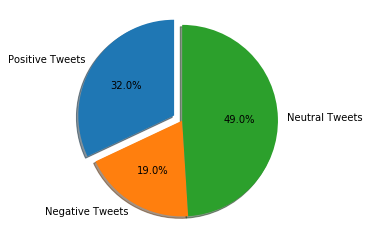

In [125]:
labels = 'Positive Tweets','Negative Tweets','Neutral Tweets'
sizes = [round(percentage_positive),round(percentage_negative),round(percentage_neutral)]
explodes = (0.1,0,0)
fig,ax = plt.subplots()
ax.pie(sizes,labels = labels,explode = explodes, autopct='%1.1f%%',shadow = True,startangle=90)
ax.axis('equal')
plt.show()

# World Cloud

In [126]:
str1 = ' '.join(test)

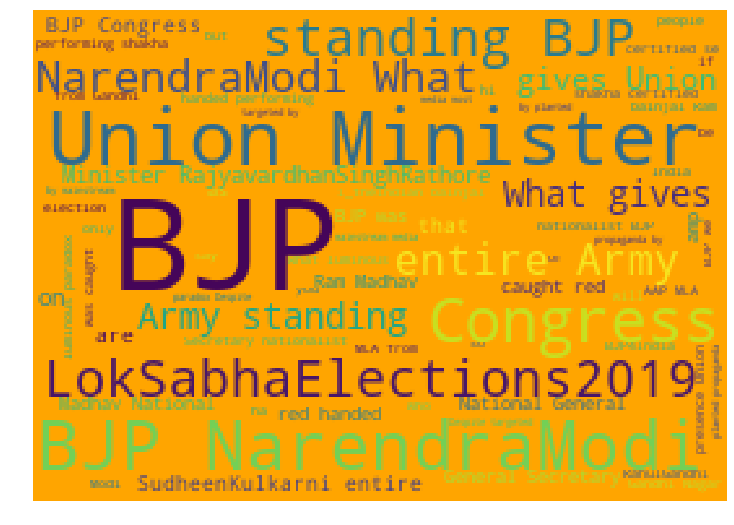

In [127]:
from PIL import Image
import urllib
import requests

stopwords = ['https','http','co','com','this','to','it','they','for','with','how','and','of','the','in','an','is','RT','twitter']
mask = np.array(Image.open(requests.get('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRCenGmMGvgjwcc7zXHLPsVyngefDerqRHYNnGK6NTo3Uj-BVmsNg', stream=True).raw))

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(stopwords, mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='orange', stopwords=stopwords, mask=mask).generate(str1)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
#Run the following to generate your wordcloud
generate_wordcloud(stopwords, mask)

In [128]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [129]:
df2 = pd.read_json(r'C:\Users\Usman\Desktop\Project\congress.json', lines = True)

In [130]:
df['Date'] = pd.to_datetime(df.created_at)
df.set_index('Date', inplace=True)
monthly_summary = pd.DataFrame()
monthly_summary['retweet_count'] = df['retweet_count'].resample('D').mean()
monthly_summary.iplot(kind='bar', xTitle='Month', yTitle='Average',
    title='Daily Average Retweet Count BJP')

In [131]:
df['Date'] = pd.to_datetime(df.created_at)
df.set_index('Date', inplace=True)
monthly_summary = pd.DataFrame()
monthly_summary['favorite_count'] = df['favorite_count'].resample('D').mean()
monthly_summary.iplot(kind='bar', xTitle='Month', yTitle='Average',
    title='Daily Average Favorite Counts BJP')

In [132]:
df2['Date'] = pd.to_datetime(df2.created_at)
df2.set_index('Date', inplace=True)
monthly_summary = pd.DataFrame()
monthly_summary['retweet_count'] = df2['retweet_count'].resample('D').mean()
monthly_summary.iplot(kind='bar', xTitle='Month', yTitle='Average',
    title='Daily Average Retweet Count Congress')

In [133]:
df2['Date'] = pd.to_datetime(df2.created_at)
df2.set_index('Date', inplace=True)
monthly_summary = pd.DataFrame()
monthly_summary['favorite_count'] = df2['favorite_count'].resample('D').mean()
monthly_summary.iplot(kind='bar', xTitle='Month', yTitle='Average',
    title='Daily Average Favorite Count Congress')